In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv('/content/Bengaluru_House_Data.csv')
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## data cleaning

In [ ]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

## Data ordering

In [ ]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
# filling the data of location,size,bath, balcony and dropping the society column

In [ ]:
# filling location
mode_location=data['location'].mode()[0]
data['location']=data['location'].fillna(mode_location)

In [ ]:
# filling size
mode_size=data['size'].mode()[0]
data['size']=data['size'].fillna(mode_size)

In [ ]:
# filling bath
median_bath=data['bath'].median()
data['bath']=data['bath'].fillna(median_bath)

In [ ]:
#filling balcony
mode_balcony=data['balcony'].mode()[0]
data['balcony']=data['balcony'].fillna(mode_balcony)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13320 non-null  object 
 3   size          13320 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## visualisation

In [ ]:
import matplotlib.pyplot as plt
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

location
Whitefield                         541
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
3rd Stage Raja Rajeshwari Nagar      1
Chuchangatta Colony                  1
Electronic City Phase 1,             1
Chikbasavanapura                     1
Abshot Layout                        1
Name: count, Length: 1305, dtype: int64


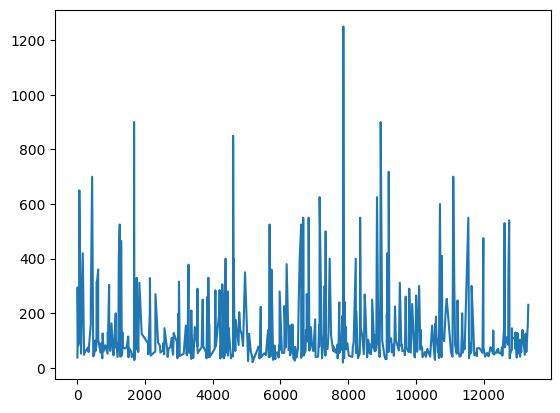

In [ ]:
white=data[data['location']=='Whitefield']
plt.plot(white.index,white['price'])
top_locations=data['location'].value_counts()
print(top_locations)

## conversion of datatypes

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['availability']=le.fit_transform(data['availability'])
data['location']=le.fit_transform(data['location'])
data['size']=le.fit_transform(data['size'])
data['total_sqft']=le.fit_transform(data['total_sqft'])
data['society']=le.fit_transform(data['society'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  int64  
 2   location      13320 non-null  int64  
 3   size          13320 non-null  int64  
 4   society       13320 non-null  int64  
 5   total_sqft    13320 non-null  int64  
 6   bath          13320 non-null  float64
 7   balcony       13320 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 936.7+ KB


In [ ]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
data['area_type'].replace(['Plot  Area','Super built-up  Area','Built-up  Area','Carpet  Area'],[1,2,3,4],inplace=True)

<ipython-input-384-d3cd87828aed>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['area_type'].replace(['Plot  Area','Super built-up  Area','Built-up  Area','Carpet  Area'],[1,2,3,4],inplace=True)
<ipython-input-384-d3cd87828aed>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['area_type'

In [ ]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,2,40,419,13,464,70,2.0,1.0,39.07
1,1,80,317,19,2439,1288,5.0,3.0,120.00
2,3,80,1179,16,2688,514,2.0,3.0,62.00
3,2,80,757,16,2186,602,3.0,1.0,95.00
4,2,80,716,13,2688,239,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,3,80,1252,22,209,1499,4.0,0.0,231.00
13316,2,80,1004,18,2688,1535,5.0,2.0,400.00
13317,3,80,972,13,1216,172,2.0,1.0,60.00
13318,2,32,907,18,2205,1680,4.0,1.0,488.00


## correlation analysis

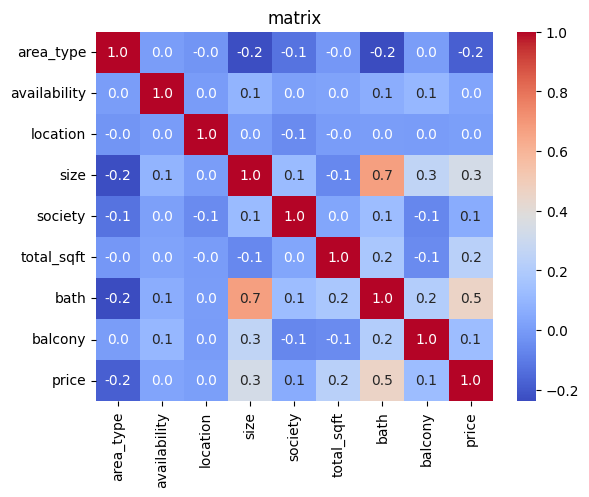

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,fmt='0.01f',cmap='coolwarm')
plt.title("matrix")
plt.show()

In [ ]:
# calculating correlation between price and other variables

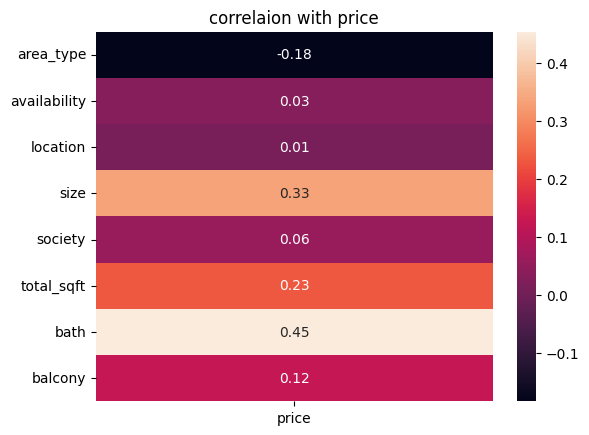

In [ ]:
price_b=data.corr()['price'].drop('price')
# heat map
sns.heatmap(price_b.to_frame(),annot=True,fmt='.2f')
plt.title('correlaion with price')
plt.show()

In [ ]:
data.drop('location',axis=1,inplace=True)

In [ ]:
# running without removing the outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data[['bath','total_sqft','size','society','availability','balcony']]
y=data[['price']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x,y)

m=model.score(xtest,ytest)
print(f'{m:.2f}')

0.24


<Axes: >

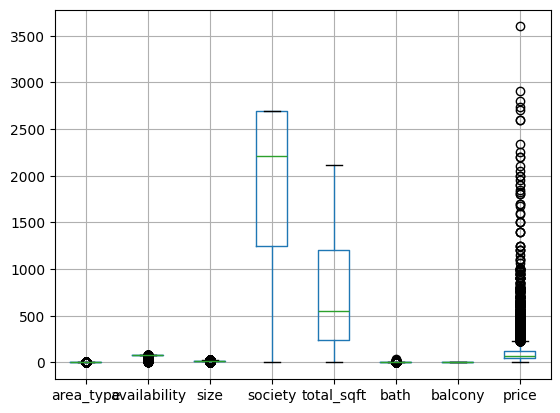

In [ ]:
# removing the outliers
data.boxplot()

In [ ]:
# removing the outliers

In [ ]:
def remove_outliers(data,exclude_column):
  for col in data.columns:
    if col==exclude_column:
      continue
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    data=data[(data[col]>=lower_bound)&(data[col]<=upper_bound)]
  return data
df_cleaned=remove_outliers(data,exclude_column='price')
data=df_cleaned

In [ ]:
#after removing the outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data[['bath','total_sqft','size','society','availability','balcony']]
y=data[['price']]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

model=LinearRegression()
model.fit(x,y)

m=model.score(xtest,ytest)
print(f'{m:.2f}')

0.43


## Min-Max Scaler

In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# #
# features=['bath','total_sqft','size','society','availability','balcony']
# #
# scaler=MinMaxScaler()
# scaled_data_array=scaler.fit_transform(data[features])

# scaled_data=pd.DataFrame(scaled_data_array,columns=features,index=data.index)
# scaled_data

In [ ]:
# #after removing the outliers
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# x=data[['bath','total_sqft','size','society','availability','balcony']]
# y=data[['price']]
# xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# model=LinearRegression()
# model.fit(x,y)

# m=model.score(xtest,ytest)
# print(f'{m:.2f}')

## Standared Scaler

In [ ]:
# from sklearn.preprocessing import StandardScaler

# # features

# scaler=StandardScaler()
# features=['bath','total_sqft','size','society','availability','balcony']
# # fit
# scaled_data_array=scaler.fit_transform(data[features])
# scaled_data=pd.DataFrame(scaled_data_array,columns=features,index=data.index)

In [ ]:
# #after removing the outliers
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# x=data[['bath','total_sqft','size','society','availability','balcony']]
# y=data[['price']]
# xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

# model=LinearRegression()
# model.fit(x,y)

# m=model.score(xtest,ytest)
# print(f'{m:.2f}')

0.43


## performing k-fold

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
kf=KFold(n_splits=5,shuffle=True,random_state=42)
model=LinearRegression()

In [ ]:
best_accuracy=0
best_fold=1

In [ ]:
best_x_train=None
best_y_train=None
best_x_test=None
best_y_test=None
best_y_pred=None

In [ ]:
kf

KFold(n_splits=5, random_state=42, shuffle=True)

In [ ]:
from sklearn.metrics import accuracy_score
for fold,(train_index,test_index) in enumerate(kf.split(x),1):
  xtrain,xtest=x.iloc[train_index],x.iloc[test_index]
  ytrain,ytest=y.iloc[train_index],y.iloc[test_index]

  model.fit(xtrain,ytrain)
  #predict
  acc=model.score(xtest,ytest)
  print("______________________")
  print(f'fold{fold} has accuracy:{acc}')

  #
  if acc>best_accuracy:
    best_accuracy=acc
    best_fold=fold
    best_x_train=xtrain
    best_x_test=xtest
    best_y_train=ytrain
    best_y_test=ytest
#output the best
print(f"\n Best Fold:{best_fold} with accuracy:{best_accuracy}")

______________________
fold1 has accuracy:0.42436193542498857
______________________
fold2 has accuracy:0.5499564926467819
______________________
fold3 has accuracy:0.49117448718272827
______________________
fold4 has accuracy:0.41544363742818513
______________________
fold5 has accuracy:0.5276143317875013

 Best Fold:2 with accuracy:0.5499564926467819


In [ ]:
#after removing the outliers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=data[['bath','total_sqft','size','society','availability','balcony']]
y=data[['price']]
xtrain=best_x_train
xtest=best_x_test
ytrain=best_y_train
ytest=best_y_test
# model
model=LinearRegression()
model.fit(x,y)

m=model.score(xtest,ytest)
print(f'{m:.2f}')

0.55


In [ ]:


from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(xtrain, ytrain)
    y_pred = model.predict(xtest)
    acc=model.score(xtest,ytest)

    r2 = r2_score(ytest, y_pred)
    mae = mean_absolute_error(ytest, y_pred)
    mse = mean_squared_error(ytest, y_pred)
    rmse = np.sqrt(mse)

    print(f"\n{name}")
    print(f"accuracy         :{acc}")
    print(f"R2 Score       : {r2:.4f}")
    print(f"MAE (Error)    : {mae:.4f}")
    print(f"MSE (Error^2)  : {mse:.4f}")
    print(f"RMSE (Error)   : {rmse:.4f}")



Linear Regression
accuracy         :0.5499564926467819
R2 Score       : 0.5500
MAE (Error)    : 26.9963
MSE (Error^2)  : 2176.8399
RMSE (Error)   : 46.6566

Ridge Regression
accuracy         :0.549982805063458
R2 Score       : 0.5500
MAE (Error)    : 26.9945
MSE (Error^2)  : 2176.7126
RMSE (Error)   : 46.6553

Lasso Regression
accuracy         :0.550801694877038
R2 Score       : 0.5508
MAE (Error)    : 26.8949
MSE (Error^2)  : 2172.7517
RMSE (Error)   : 46.6128

ElasticNet Regression
accuracy         :0.5485028720662493
R2 Score       : 0.5485
MAE (Error)    : 26.9021
MSE (Error^2)  : 2183.8710
RMSE (Error)   : 46.7319

Decision Tree
accuracy         :0.21148752061295573
R2 Score       : 0.2115
MAE (Error)    : 23.2798
MSE (Error^2)  : 3813.9988
RMSE (Error)   : 61.7576


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Random Forest
accuracy         :0.706188008188745
R2 Score       : 0.7062
MAE (Error)    : 18.8248
MSE (Error^2)  : 1421.1552
RMSE (Error)   : 37.6982


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?



Gradient Boosting
accuracy         :0.6823661407579544
R2 Score       : 0.6824
MAE (Error)    : 21.3755
MSE (Error^2)  : 1536.3805
RMSE (Error)   : 39.1967

AdaBoost
accuracy         :0.522689967781425
R2 Score       : 0.5227
MAE (Error)    : 26.5224
MSE (Error^2)  : 2308.7268
RMSE (Error)   : 48.0492


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Support Vector Regressor
accuracy         :0.429902312575035
R2 Score       : 0.4299
MAE (Error)    : 24.9874
MSE (Error^2)  : 2757.5365
RMSE (Error)   : 52.5123

K-Nearest Neighbors
accuracy         :0.7251352849201425
R2 Score       : 0.7251
MAE (Error)    : 19.7125
MSE (Error^2)  : 1329.5081
RMSE (Error)   : 36.4624
